In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_score(df, x, y):
    xmap = {"n_clusters": "Number of clusters", "eps": "Epsilon", "min_samples": "Minimum number of samples"}
    df_mean = df.dropna()[[x, y]].groupby(x).mean()
    if y == "silhouette":
        t = "Silhouette Score"
        optimal_x = df_mean.idxmax().values[0]
    elif y == "davies_bouldin":
        t = "Davies Bouldin Score"
        optimal_x = df_mean.idxmin().values[0]
    elif y == "calinski":
        t = "Calinski Harabasz Score"
        optimal_x = df_mean.idxmax().values[0]

    # plt.plot(df[x], df[y])
    plt.figure()
    sns.lineplot(df, x=x, y=y)
    plt.ylabel(t)
    plt.xlabel(xmap[x])
    plt.axvline(optimal_x, color="orange")
    plt.tight_layout()

In [3]:
def plot_all_scores(scores, x="n_clusters", algorithm="kmeans", output_path="output/", suffix=None, save=True):
    plot_score(scores, x, "silhouette")  # KMeans: k=10 (close to 1 = best)
    if save:
        plt.savefig(f"{output_path}{algorithm}/silhouette_{algorithm}_{x}{suffix}.png")
    plt.show()

    plot_score(scores, x, "davies_bouldin")  # KMeans: k=10 (closest to minimum (zero)
    if save:
        plt.savefig(f"{output_path}{algorithm}/davies_bouldin_{algorithm}_{x}{suffix}.png")
    plt.show()

    plot_score(scores, x, "calinski")  # KMeans: k= (max is best)
    if save:
        plt.savefig(f"{output_path}{algorithm}/calinski_harabasz_{algorithm}_{x}{suffix}.png")
    plt.show()

In [4]:
xmap = {"n_clusters": "Number of clusters", "eps": "Epsilon", "min_samples": "Minimum number of samples"}
c_blue = sns.color_palette("tab10")[0]
c_orange = sns.color_palette("tab10")[1]

def plot_score_matrix(df, x):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

    # plot lines
    l1 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="calinski", ax=axs[0, 0], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l2 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="davies_bouldin", ax=axs[0, 1], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l3 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="silhouette", ax=axs[0, 2], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    
    l4 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="calinski", ax=axs[1, 0], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l5 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="davies_bouldin", ax=axs[1, 1], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l6 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="silhouette", ax=axs[1, 2], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    
    # define labels
    l1.set(xlabel=None, ylabel="Scores on original data", title="Calinski-Harabasz Score")
    l2.set(xlabel=None, ylabel=None, title="Davies-Bouldin Score")
    l3.set(xlabel=None, ylabel=None, title="Silhouette Score")
    l4.set(xlabel=None, ylabel="Scores on embedded data")
    l5.set(xlabel=None, ylabel=None)
    l6.set(xlabel=None, ylabel=None)
    fig.supxlabel(xmap[x])
    
    # define optimal picks 
    ch_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    
    db_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    
    s_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    
    # plot optimal picks
    axs[0, 0].axvline(ch_oo, color=c_blue)
    axs[0, 0].axvline(ch_oe, color=c_orange)
    axs[1, 0].axvline(ch_eo, color=c_blue)
    axs[1, 0].axvline(ch_ee, color=c_orange)
    
    axs[0, 1].axvline(db_oo, color=c_blue)
    axs[0, 1].axvline(db_oe, color=c_orange)
    axs[1, 1].axvline(db_eo, color=c_blue)
    axs[1, 1].axvline(db_ee, color=c_orange)
    
    axs[0, 2].axvline(s_oo, color=c_blue)
    axs[0, 2].axvline(s_oe, color=c_orange)
    axs[1, 2].axvline(s_eo, color=c_blue)
    axs[1, 2].axvline(s_ee, color=c_orange)
    
    plt.tight_layout()

In [5]:
def plot_small_score_matrix(df, x):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
    
    # plot lines
    l1 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="calinski", ax=axs[0, 0], c=c_blue)
    l2 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="davies_bouldin", ax=axs[0, 1], c=c_blue)
    l3 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="silhouette", ax=axs[0, 2], c=c_blue)
    
    l4 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="calinski", ax=axs[1, 0], c=c_orange)
    l5 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="davies_bouldin", ax=axs[1, 1], c=c_orange)
    l6 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="silhouette", ax=axs[1, 2], c=c_orange)
    
    # define labels
    l1.set(xlabel=None, ylabel="Clustering on original data", title="Calinski-Harabasz Score")
    l2.set(xlabel=None, ylabel=None, title="Davies-Bouldin Score")
    l3.set(xlabel=None, ylabel=None, title="Silhouette Score")
    l4.set(xlabel=None, ylabel="Clustering on embedded data")
    l5.set(xlabel=None, ylabel=None)
    l6.set(xlabel=None, ylabel=None)
    fig.supxlabel(xmap[x])

    # define optimal picks 
    ch_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    
    db_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    
    s_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    
    # plot optimal picks
    axs[0, 0].axvline(ch_oo, color=c_blue)
    axs[1, 0].axvline(ch_ee, color=c_orange)
    
    axs[0, 1].axvline(db_oo, color=c_blue)
    axs[1, 1].axvline(db_ee, color=c_orange)
    
    axs[0, 2].axvline(s_oo, color=c_blue)
    axs[1, 2].axvline(s_ee, color=c_orange)
    
    plt.tight_layout()

In [6]:
def plot_heatmap(df, x="min_samples", y="eps", color="nclusters", title="Sweep of DBSAN (on original data)"):
    idx = df[y].unique()
    cols = df[x].unique()
    field = pd.DataFrame(df[color].to_numpy().reshape(len(idx), len(cols)), index=idx, columns=cols)
    sns.heatmap(data=field, cbar_kws={'label': color}, annot=True, fmt='g')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

In [9]:
import glob

dfs = []
for p in glob.glob("output/*.csv"):
    a = pd.read_csv(p)
    eps = float(p.split("_")[5].lstrip("eps-"))
    min_samples = p.split("_")[7].lstrip("samples-").rstrip(".csv")
    a["eps"] = eps
    a["min_samples"] = min_samples
    dfs.append(a)

df = pd.concat(dfs)

In [10]:
df_dbscan = df.copy()

In [11]:
# load data
df_kmeans = pd.read_csv(f"output_old/kmeans_scores.csv")
df_ward = pd.read_csv(f"output_old/ward_scores.csv")
# df_dbscan = pd.read_csv(f"output_old/dbscan_scores.csv")

In [12]:
output_dir = "output_final/"

In [13]:
# plot_all_scores(df[(df["clustering_on"] == "embedding") & (df["scores_on"] == "embedding")], 
#                 x="n_clusters", algorithm="kmeans", suffix=None)

## KMeans

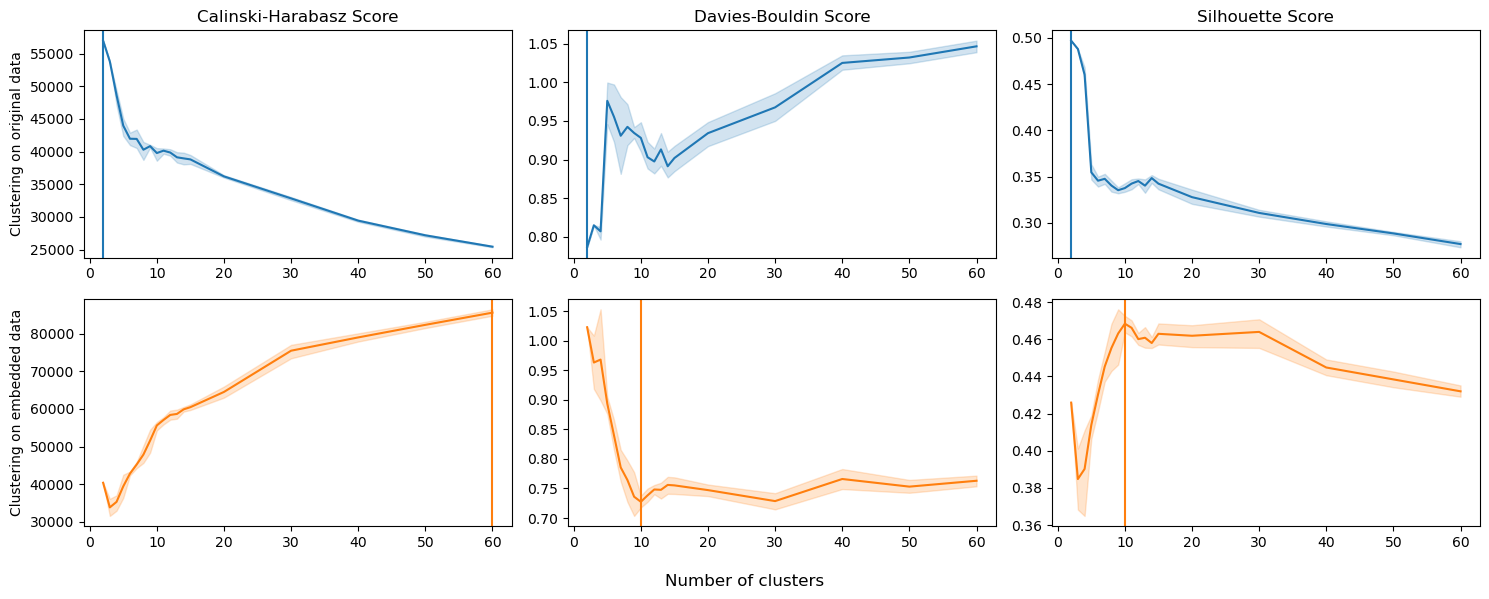

In [14]:
plot_small_score_matrix(df_kmeans, x="n_clusters")
plt.savefig(output_dir + "kmeans/small_score_matrix.png")
plt.show()

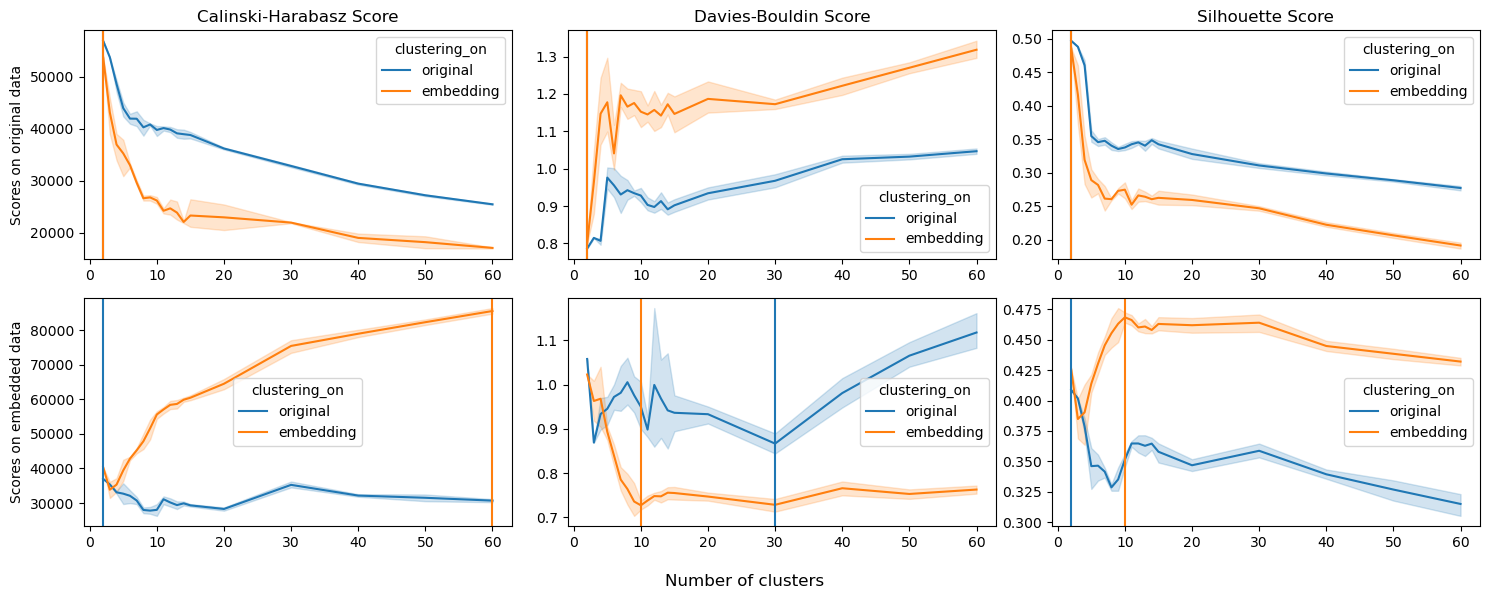

In [15]:
plot_score_matrix(df_kmeans, x="n_clusters")
plt.savefig(output_dir + "kmeans/score_matrix.png")
plt.show()

Scores on embedded data: Clustering on embedding better <br>
Scores on original data: Clustering on original data better

## Agglomerative Ward

In [11]:
df_ward = df_ward.drop("distance_threshold", axis=1)

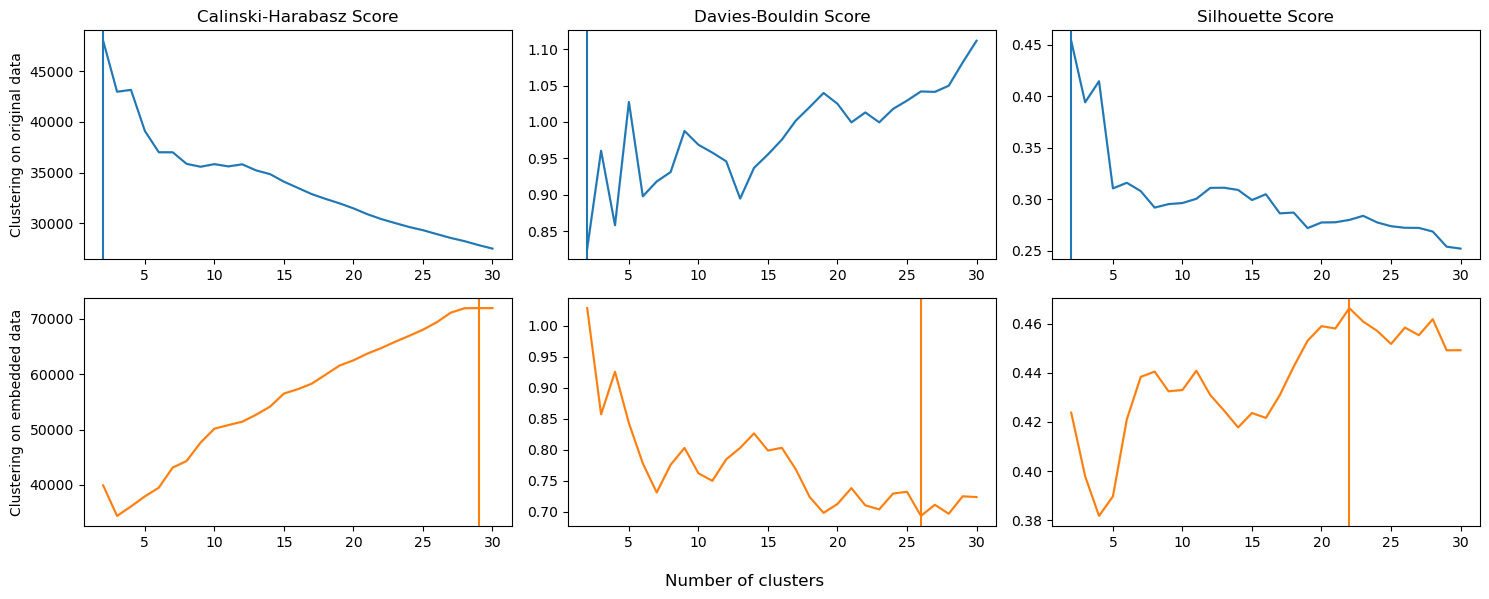

In [14]:
plot_small_score_matrix(df_ward, x="n_clusters")
plt.savefig(output_dir + "ward/small_score_matrix_eps.png")
plt.show()

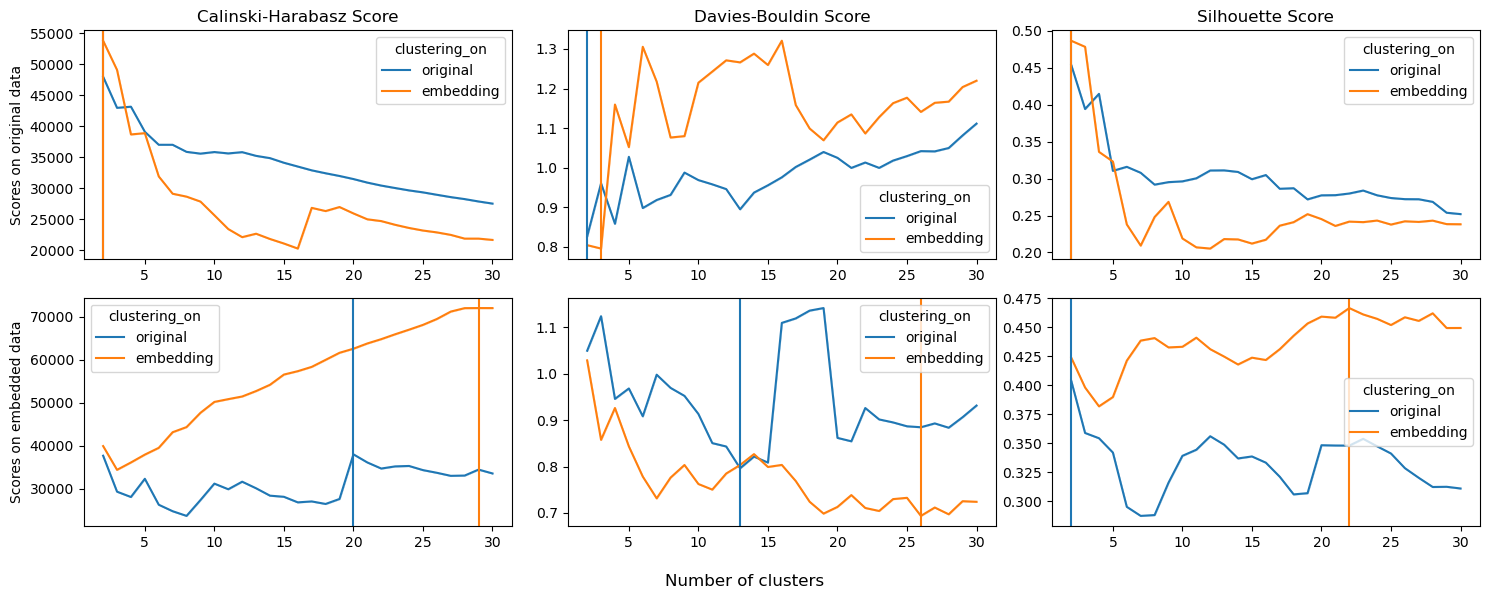

In [13]:
plot_score_matrix(df_ward, x="n_clusters")
plt.savefig(output_dir + "ward/score_matrix.png")
plt.show()

Variations are very small --> Errorbar is not visible on these scales. <br>
Scores on embedded data: Clustering on embedding better <br>
Scores on original data: Clustering on original data better    

In [26]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [30]:
import pickle
ward_original = pickle.load(open(output_dir + "ward/ward_original.pickle", 'rb'))
ward_umap = pickle.load(open(output_dir + "ward/ward_umap.pickle", 'rb'))

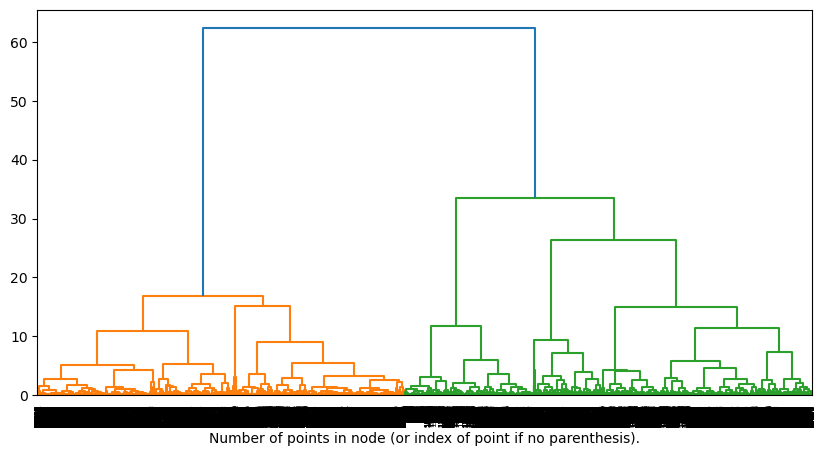

In [32]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

plot_dendrogram(ward_original)#, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

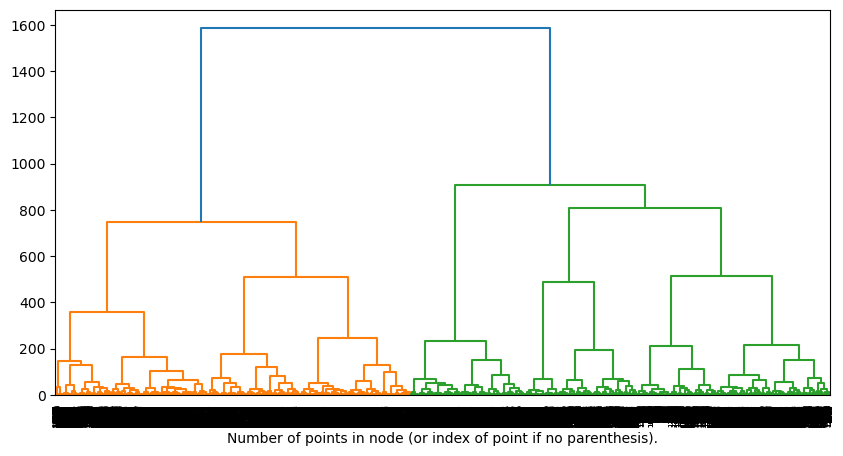

In [33]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

plot_dendrogram(ward_umap)#, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCAN

ValueError: attempt to get argmax of an empty sequence

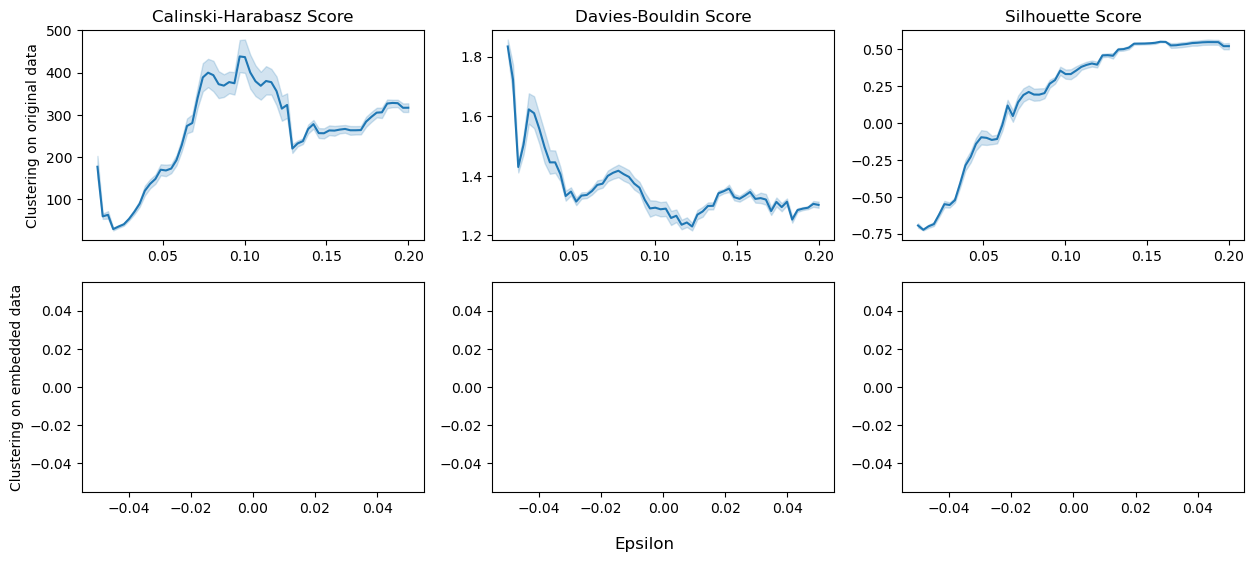

In [45]:
plot_small_score_matrix(df_dbscan, x="eps")
plt.savefig(output_dir + "dbscan/small_score_matrix_eps.png")
plt.show()

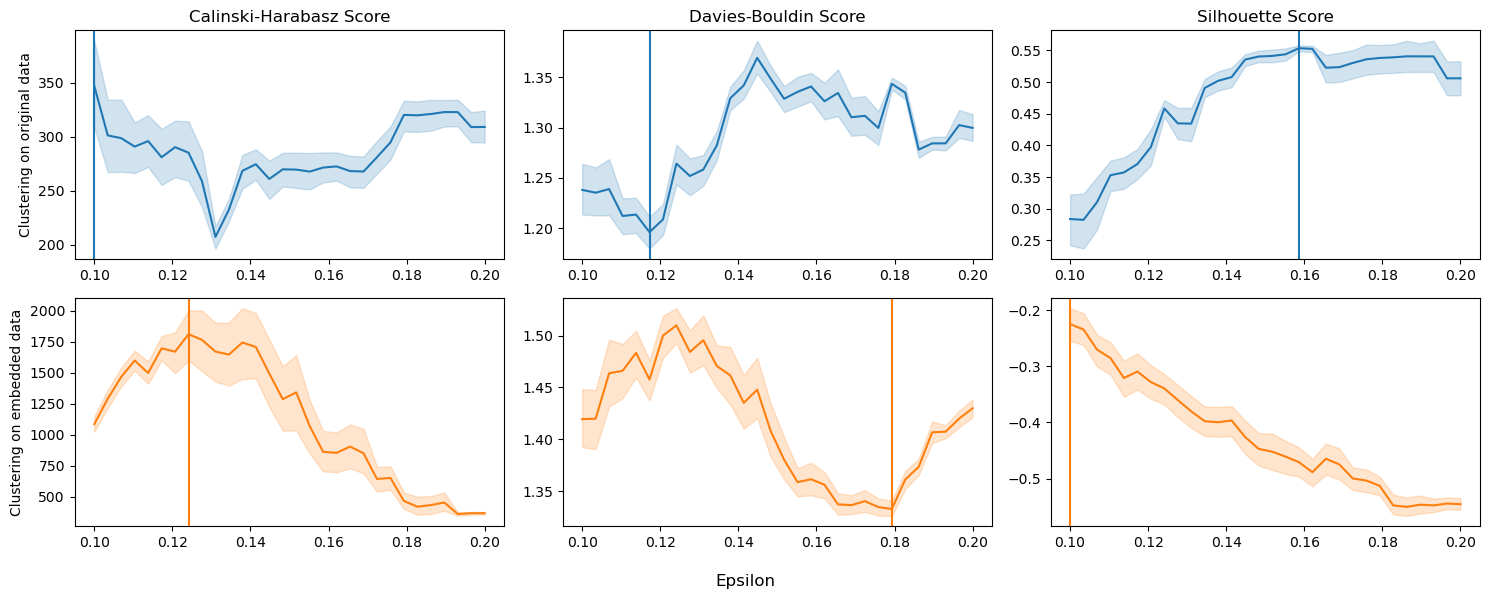

In [15]:
plot_small_score_matrix(df_dbscan, x="eps")
plt.savefig(output_dir + "dbscan/small_score_matrix_eps.png")
plt.show()

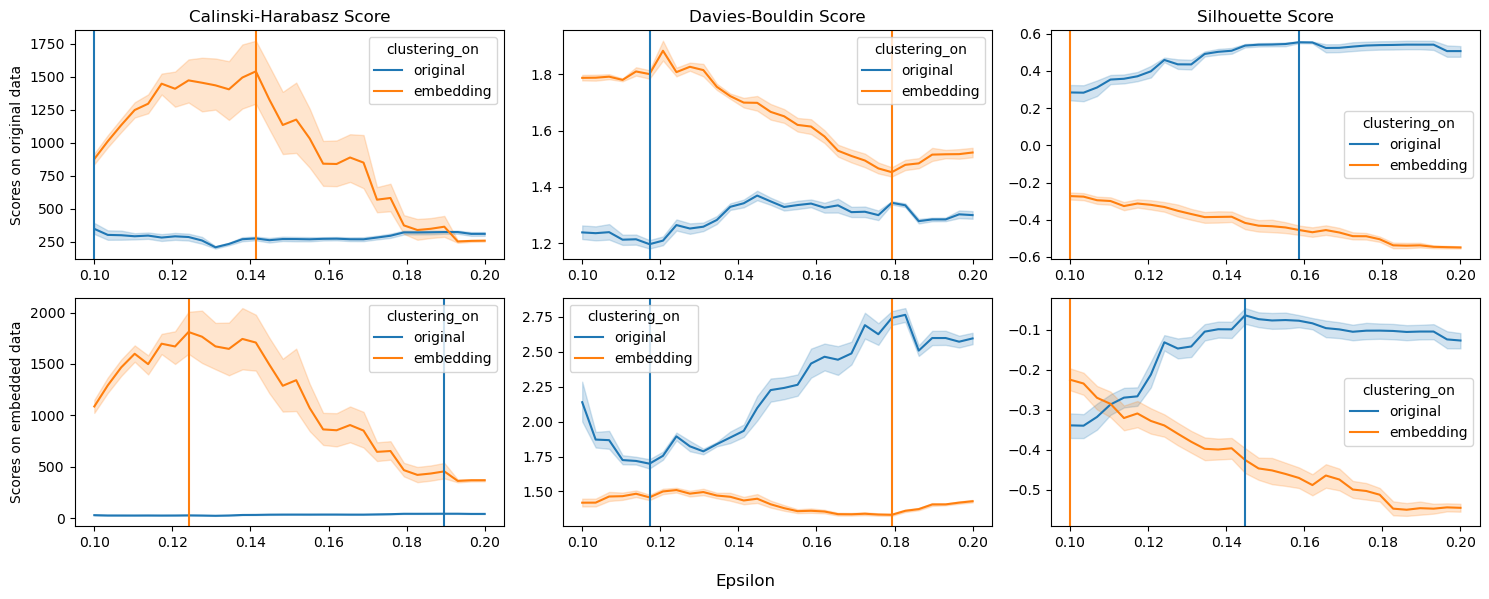

In [16]:
plot_score_matrix(df_dbscan, x="eps")
plt.savefig(output_dir + "dbscan/score_matrix_eps.png")
plt.show()

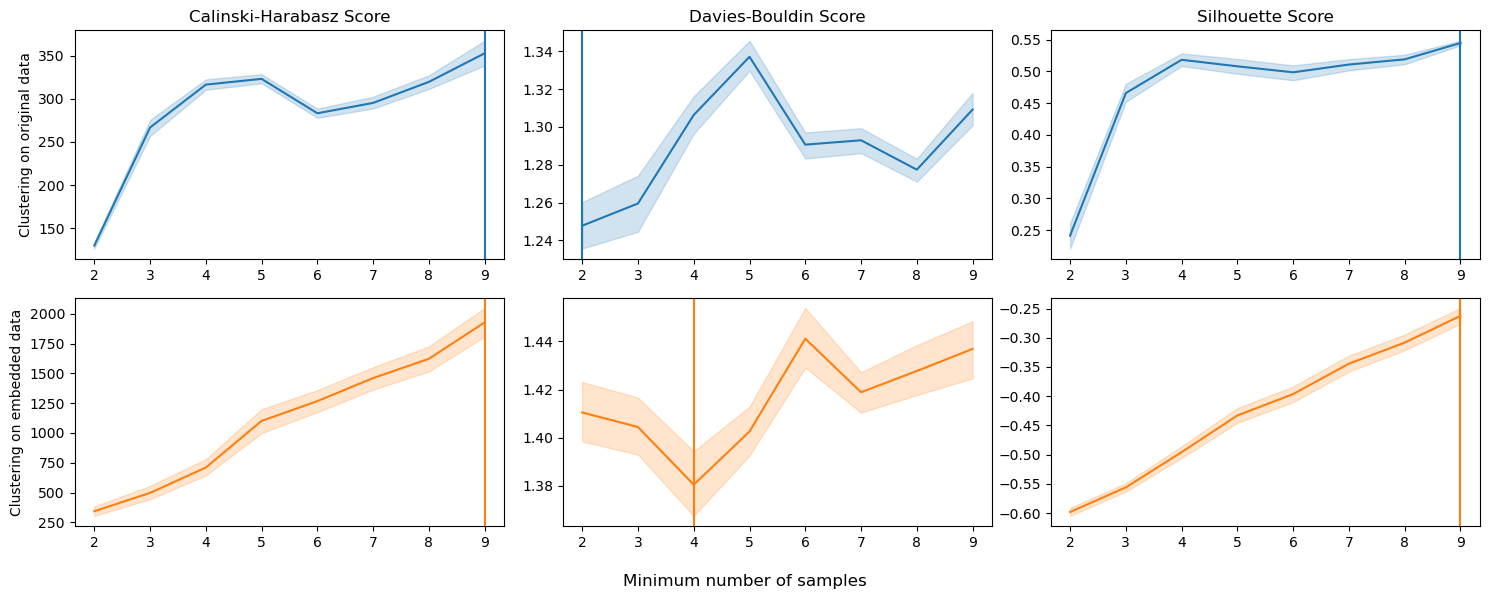

In [17]:
plot_small_score_matrix(df_dbscan, x="min_samples")
plt.savefig(output_dir + "dbscan/small_score_matrix_min_samples.png")
plt.show()

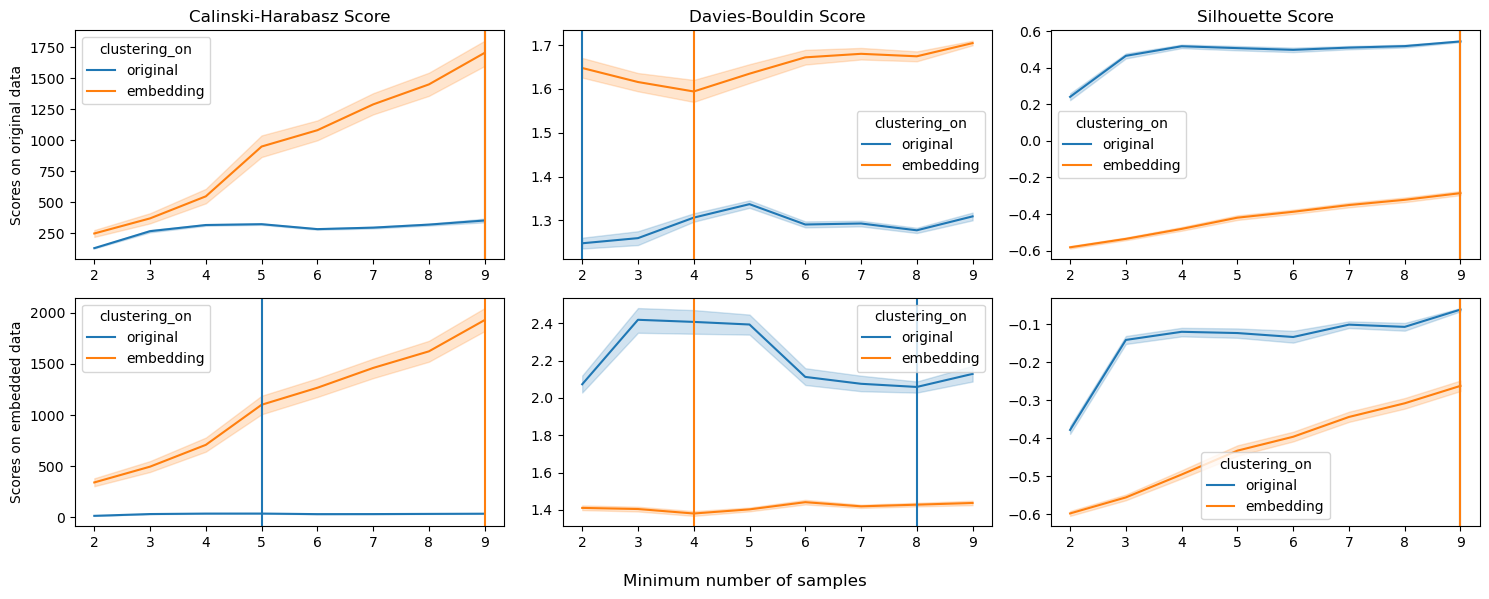

In [18]:
plot_score_matrix(df_dbscan, x="min_samples")
plt.savefig(output_dir + "dbscan/score_matrix_min_samples.png")
plt.show()

### Heatmap
The tuning of 2 parameters instead of one is more complex due to the interaction between the parameters. Therefore, considering plots displaying only one parameter is less descriptive of the actual behaviour. Therefore, we plot the following heatmap.

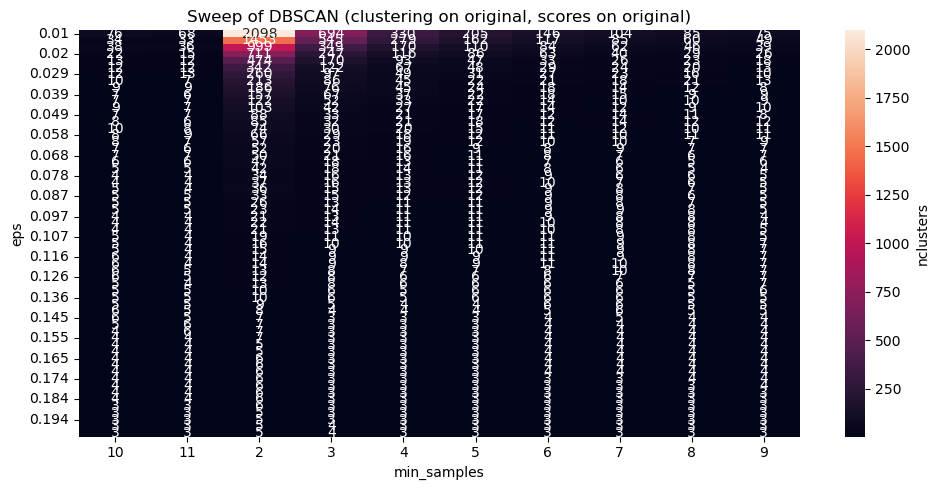

In [52]:
# average scores over iterations
df_dbscan_i = df_dbscan.groupby(["eps", "min_samples", "clustering_on", "scores_on"]).mean().drop("iteration", axis=1).reset_index()

# plot heatmaps
plt.rcParams["figure.figsize"] = (10, 5)
for clustering_on in df_dbscan["clustering_on"].unique():
    for scores_on in df_dbscan["scores_on"].unique():
        temp = df_dbscan_i[(df_dbscan_i["clustering_on"] == clustering_on) & (df_dbscan_i["scores_on"] == scores_on)].copy()
        temp.eps = temp.eps.round(3)
        plot_heatmap(temp, x="min_samples", y="eps", color="nclusters", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
        plt.tight_layout()
        plt.savefig(output_dir + f"dbscan/sweep_clustering_on_{clustering_on}_scores_on{scores_on}.png")
        plt.show()

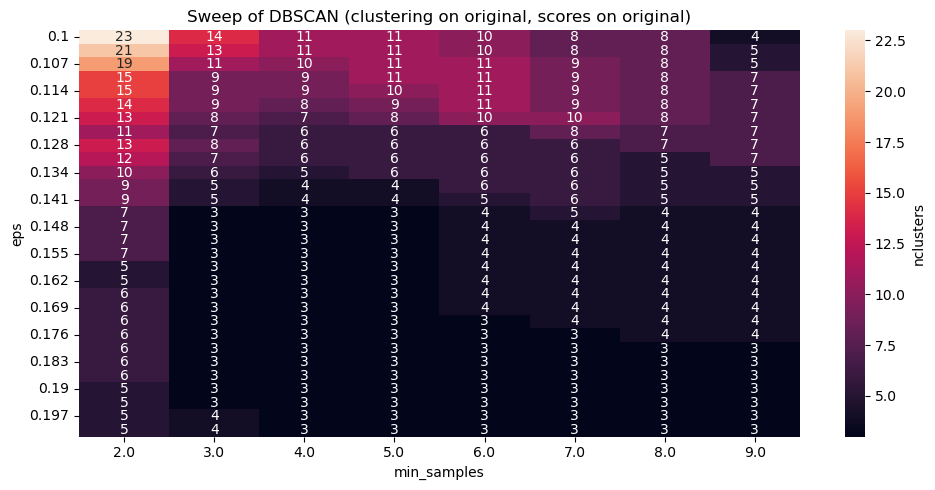

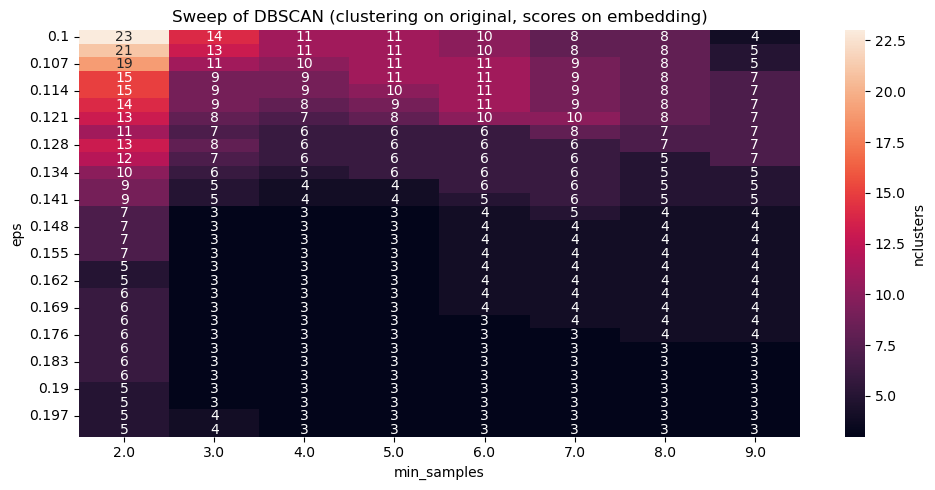

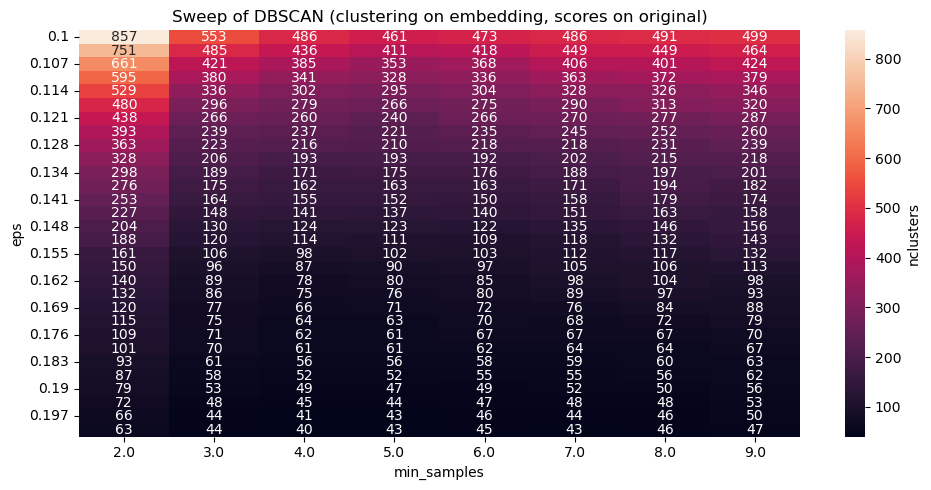

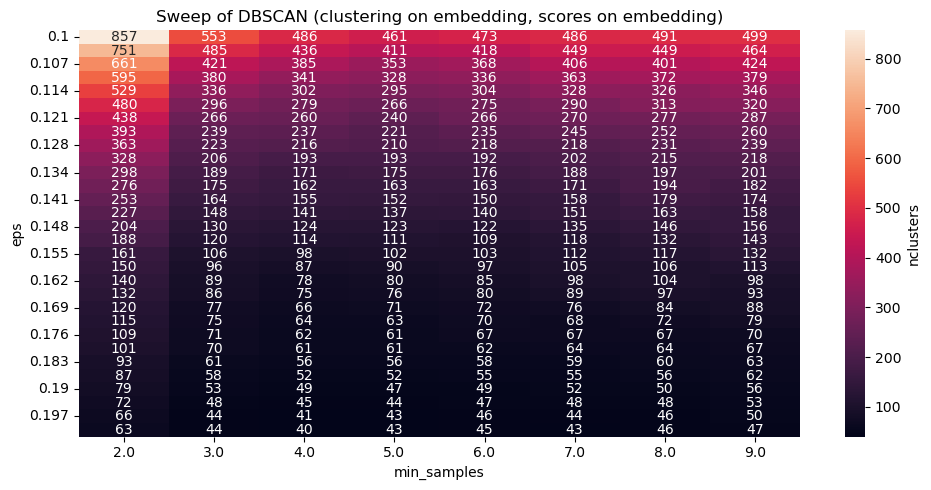

In [19]:
# average scores over iterations
df_dbscan_i = df_dbscan.groupby(["eps", "min_samples", "clustering_on", "scores_on"]).mean().drop("iteration", axis=1).reset_index()

# plot heatmaps
plt.rcParams["figure.figsize"] = (10, 5)
for clustering_on in df_dbscan["clustering_on"].unique():
    for scores_on in df_dbscan["scores_on"].unique():
        temp = df_dbscan_i[(df_dbscan_i["clustering_on"] == clustering_on) & (df_dbscan_i["scores_on"] == scores_on)].copy()
        temp.eps = temp.eps.round(3)
        plot_heatmap(temp, x="min_samples", y="eps", color="nclusters", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
        plt.tight_layout()
        plt.savefig(output_dir + f"dbscan/sweep_clustering_on_{clustering_on}_scores_on{scores_on}.png")
        plt.show()

In [61]:
# # finding maximum gradient in heatmap
# temp = df_dbscan_i[(df_dbscan_i["clustering_on"] == "original") & (df_dbscan_i["scores_on"] == "original")].copy()
# temp.eps = temp.eps.round(3)

# x="min_samples"
# y="eps"
# color="nclusters"

# idx = temp[y].unique()
# cols = temp[x].unique()
# field = pd.DataFrame(temp[color].to_numpy().reshape(len(idx), len(cols)), index=idx, columns=cols)

# max_diffs = []
# for i in range(len(field.columns) - 1): 
#     c0 = field.columns[i]
#     c1 = field.columns[i+1]
#     diff = abs(field[c0] - field[c1]).max()
#     diff_idx = abs(field[c0] - field[c1]).idxmax()
#     print(diff_idx, diff)
#     max_diffs.append([diff_idx, diff])

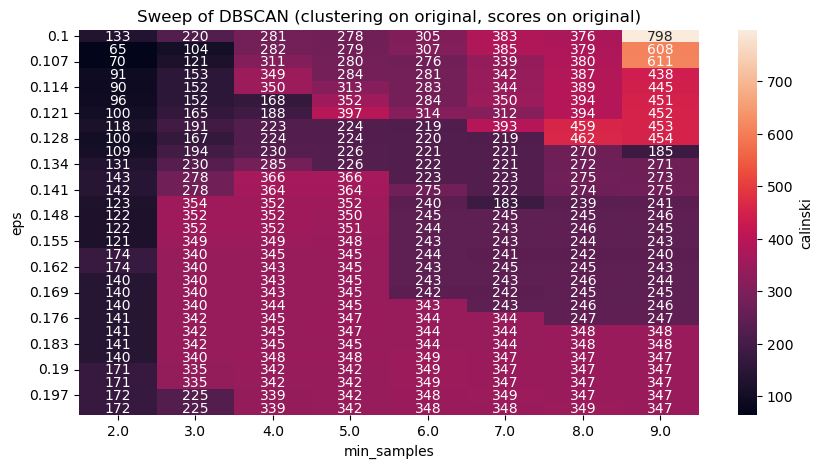

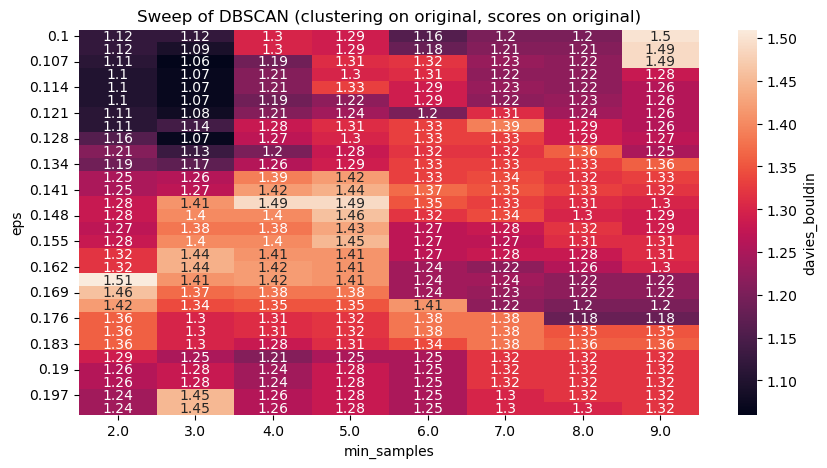

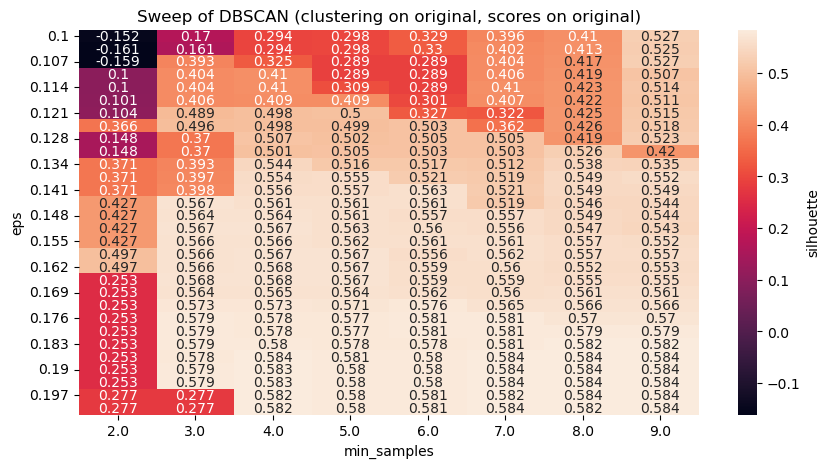

In [20]:
clustering_on = "original"
scores_on = "original"

temp = df_dbscan_i[(df_dbscan_i["clustering_on"] == clustering_on) & (df_dbscan_i["scores_on"] == scores_on)].copy()
temp.eps = temp.eps.round(3)
temp.silhouette = temp.silhouette.round(3)
temp.calinski = temp.calinski.round()
temp.davies_bouldin = temp.davies_bouldin.round(2)

plot_heatmap(temp, x="min_samples", y="eps", color="calinski", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.show()
plot_heatmap(temp, x="min_samples", y="eps", color="davies_bouldin", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.show()
plot_heatmap(temp, x="min_samples", y="eps", color="silhouette", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.show()

In [21]:
temp[temp.calinski == temp.calinski.max()]

,eps,min_samples,clustering_on,scores_on,calinski,davies_bouldin,nclusters,silhouette
31,0.1,9.0,original,original,798.0,1.5,4.0,0.527


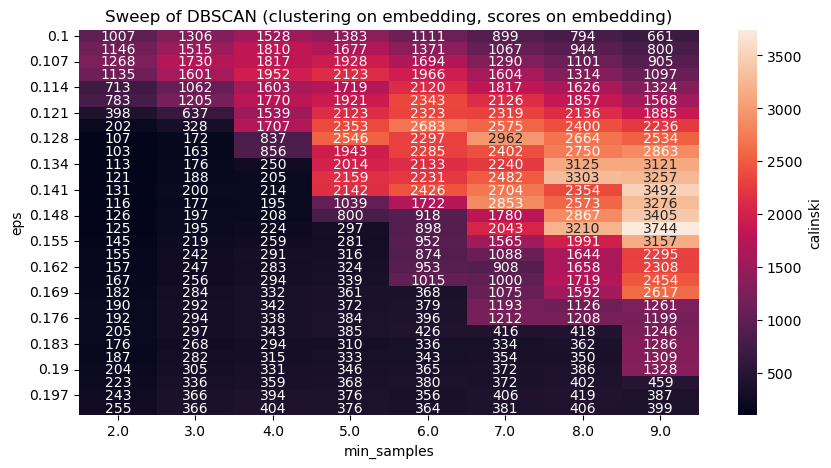

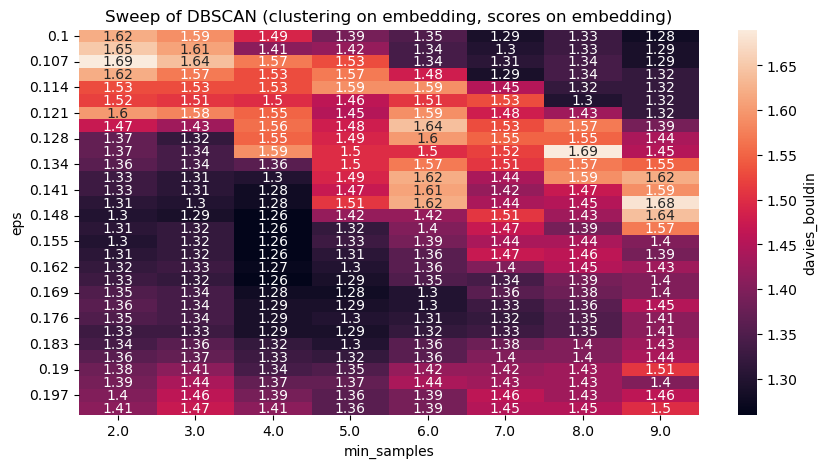

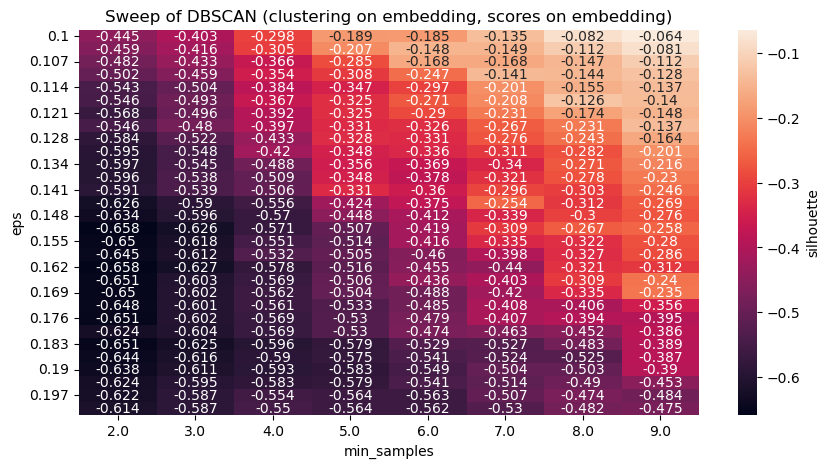

In [22]:
clustering_on = "embedding"
scores_on = "embedding"

temp = df_dbscan_i[(df_dbscan_i["clustering_on"] == clustering_on) & (df_dbscan_i["scores_on"] == scores_on)].copy()
temp.eps = temp.eps.round(3)
temp.silhouette = temp.silhouette.round(3)
temp.calinski = temp.calinski.round()
temp.davies_bouldin = temp.davies_bouldin.round(2)

plot_heatmap(temp, x="min_samples", y="eps", color="calinski", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.savefig(output_dir + f"dbscan/sweep_clustering_on_{clustering_on}_scores_on{scores_on}_calinski.png")
plt.show()
plot_heatmap(temp, x="min_samples", y="eps", color="davies_bouldin", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.savefig(output_dir + f"dbscan/sweep_clustering_on_{clustering_on}_scores_on{scores_on}_davies_bouldin.png")
plt.show()
plot_heatmap(temp, x="min_samples", y="eps", color="silhouette", title=f"Sweep of DBSCAN (clustering on {clustering_on}, scores on {scores_on})")
plt.savefig(output_dir + f"dbscan/sweep_clustering_on_{clustering_on}_scores_on{scores_on}_silhouette.png")
plt.show()

In [23]:
temp[temp.davies_bouldin == temp.davies_bouldin.min()]

,eps,min_samples,clustering_on,scores_on,calinski,davies_bouldin,nclusters,silhouette
456,0.148,4.0,embedding,embedding,208.0,1.26,124.0,-0.570
488,0.152,4.0,embedding,embedding,224.0,1.26,114.0,-0.571
520,0.155,4.0,embedding,embedding,259.0,1.26,98.0,-0.551
552,0.159,4.0,embedding,embedding,291.0,1.26,87.0,-0.532
616,0.166,4.0,embedding,embedding,294.0,1.26,75.0,-0.569
